In [1]:
import pandas as pd
import FinanceDataReader as fdr

In [2]:
df = fdr.DataReader('005930', "2017", "2022")
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998


<Axes: xlabel='Date'>

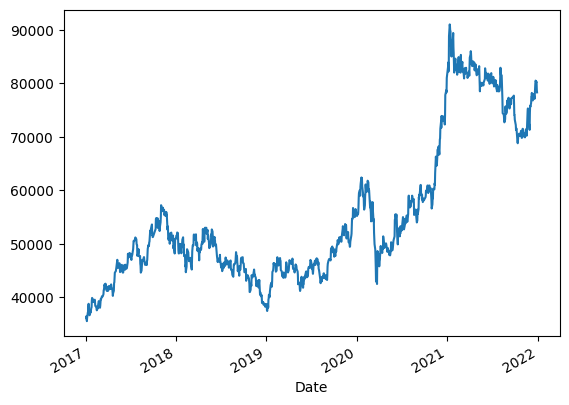

In [3]:
df["Close"].plot()

## 상장종목 목록 가져오기

In [4]:
df_krx = pd.read_csv("krx.csv")
df_krx.shape

(2646, 9)

## 상장종목 목록 사용하기
* 종목명과 심볼을 찾기 위해 상장종목 목록을 사용합니다.

In [5]:
df_krx[["Symbol", "Name"]].head()

,Symbol,Name
0,432720,퀄리타스반도체
1,351020,미쥬
2,396470,워트
3,246250,에스엘에스바이오
4,416180,신성에스티


In [6]:
item_name = "하이브"
df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()[0]

352820

## 종목명으로 종목 코드를 받아오는 함수 만들기

In [7]:
def item_code_by_item_name(item_name):
    item_code_list = df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()
    if len(item_code_list) > 0:
        item_code = item_code_list[0]
        return str(item_code)
    else:
        return False

In [8]:
item_code_by_item_name("하이브")

'352820'

In [9]:
item_code_by_item_name("네이버")

False

In [10]:
item_code_by_item_name("NAVER")

'35420'

In [11]:
item_code_by_item_name("삼성전자")

'5930'

In [12]:
item_code_by_item_name("셀트리온")

'68270'

In [13]:
item_code_by_item_name("카카오게임즈")

'293490'

In [14]:
fdr.DataReader(item_code_by_item_name("하이브"))

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-10-15,267300,347490,250965,255420,6557212,NaN
2020-10-16,250469,250469,197010,198495,4504395,-0.222868
2020-10-19,196515,200475,185129,187110,1977996,-0.057357
2020-10-20,188100,191565,174240,180675,1811616,-0.034392
2020-10-21,178695,183645,175230,177210,1658643,-0.019178
...,...,...,...,...,...,...
2023-10-31,223500,225500,216000,219500,130896,0.000000
2023-11-01,220000,231000,214000,230500,259672,0.050114
2023-11-02,235000,243000,220500,227500,606694,-0.013015


## 종목명으로 일별시세를 받아오는 함수 만들기

In [15]:
def find_item_list(item_name, year=2020):
    item_code = item_code_by_item_name(item_name)
    if item_code:
        df_day = fdr.DataReader(item_code, str(year))
        return df_day
    else:
        return False

In [16]:
find_item_list("하이브")

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-10-15,267300,347490,250965,255420,6557212,NaN
2020-10-16,250469,250469,197010,198495,4504395,-0.222868
2020-10-19,196515,200475,185129,187110,1977996,-0.057357
2020-10-20,188100,191565,174240,180675,1811616,-0.034392
2020-10-21,178695,183645,175230,177210,1658643,-0.019178
...,...,...,...,...,...,...
2023-10-31,223500,225500,216000,219500,130896,0.000000
2023-11-01,220000,231000,214000,230500,259672,0.050114
2023-11-02,235000,243000,220500,227500,606694,-0.013015


### 종목명으로 일별 시세를 잘 가져오는지 확인하기

In [17]:
find_item_list("LG화학")

"51910" invalid symbol or has no data


""


In [18]:
stock_daily = find_item_list("하이브")
stock_daily

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-10-15,267300,347490,250965,255420,6557212,NaN
2020-10-16,250469,250469,197010,198495,4504395,-0.222868
2020-10-19,196515,200475,185129,187110,1977996,-0.057357
2020-10-20,188100,191565,174240,180675,1811616,-0.034392
2020-10-21,178695,183645,175230,177210,1658643,-0.019178
...,...,...,...,...,...,...
2023-10-31,223500,225500,216000,219500,130896,0.000000
2023-11-01,220000,231000,214000,230500,259672,0.050114
2023-11-02,235000,243000,220500,227500,606694,-0.013015


## 개별종목 시세 시각화
### pandas 의 plot으로 시각화 하기

<Axes: xlabel='Date'>

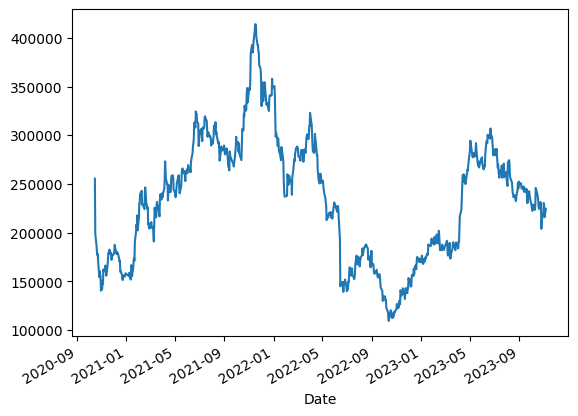

In [19]:
stock_daily["Close"].plot()

<Axes: xlabel='Date'>

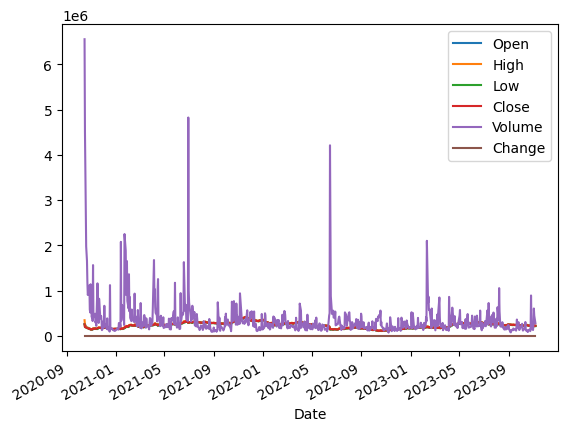

In [20]:
stock_daily.plot()

### 서브플롯 그리기

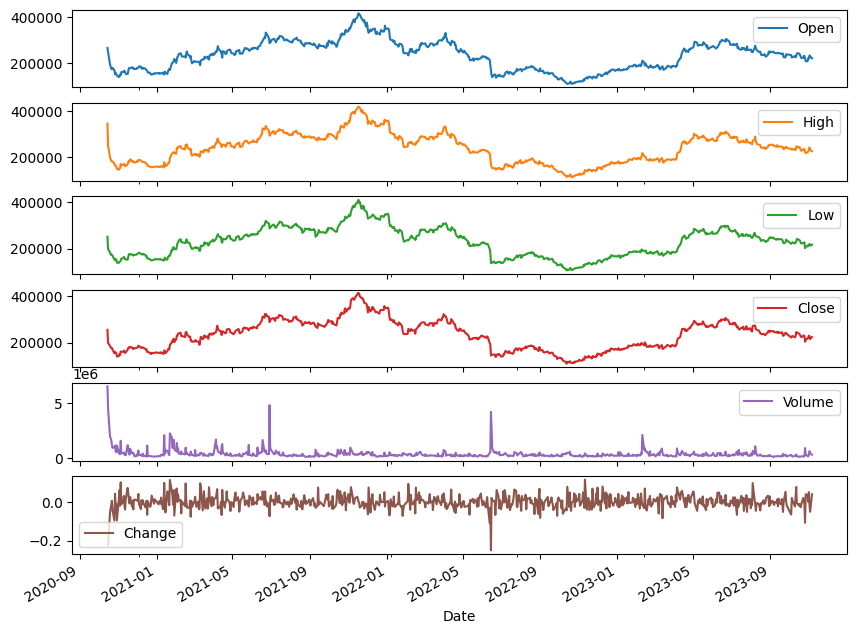

In [21]:
g = stock_daily.plot(subplots=True, figsize=(10, 8))

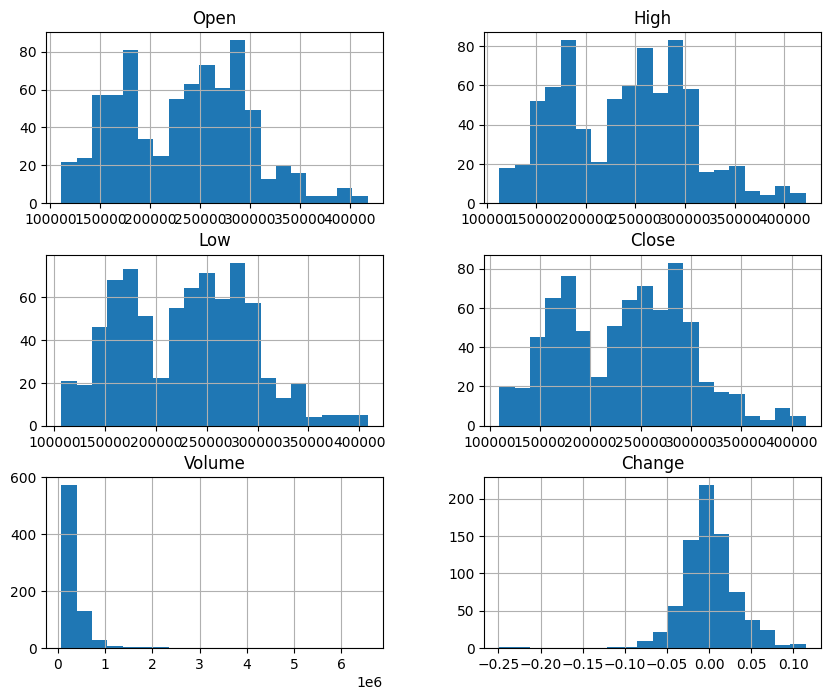

In [22]:
h = stock_daily.hist(figsize=(10, 8), bins=20)

### 2축 그래프 그리기

<Axes: xlabel='Date'>

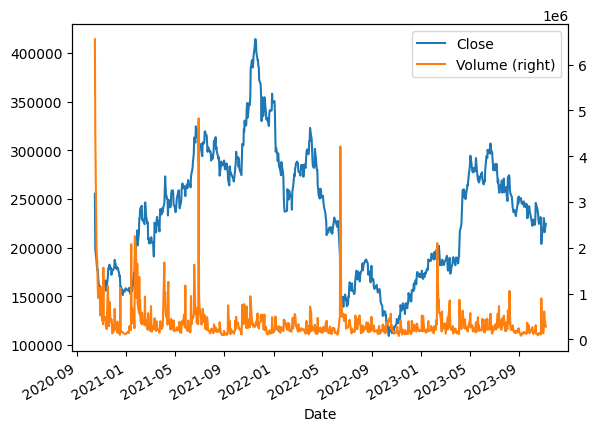

In [23]:
stock_daily[["Close", "Volume"]].plot(secondary_y="Volume")

In [24]:
stock_daily.describe()

,Open,High,Low,Close,Volume,Change
count,756.000000,756.000000,756.000000,756.000000,7.560000e+02,755.000000
mean,233992.574074,239432.010582,228847.974868,233664.933862,3.558306e+05,0.000413
std,63895.359238,64887.984989,62606.598453,63669.887261,4.489850e+05,0.033844
min,111000.000000,113000.000000,107000.000000,109500.000000,7.409200e+04,-0.248705
25%,177157.500000,181170.000000,173250.000000,177207.500000,1.742542e+05,-0.018519
50%,240750.000000,245750.000000,235312.500000,240287.500000,2.434885e+05,0.000000
75%,281000.000000,287000.000000,276500.000000,280625.000000,3.942912e+05,0.017825
max,418000.000000,421500.000000,408500.000000,414000.000000,6.557212e+06,0.114625
